# Cancer remission and tumor stability

In [1]:
import numpy as np
from agent_model import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline

## Modelo de agentes v1

* Equilateral triangle 2D lattice.
* Fixed position tumor cell and moving T-Cells.
* Cell division as a function of blood irrigation (nutrient availability).
* Rigid and periodic boundary conditions.
* Cell necrosis as a function of its distance to the tumor surface.

In [2]:
N = 50
timesteps = 50

center_pos = N**2//2 + N//2
hc = Tissue(N, center_pos, boundary="rigid")

for i in range(timesteps):
    hc.timestep()

In [3]:
interact(hc.plot_tumor, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

A Jupyter Widget

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

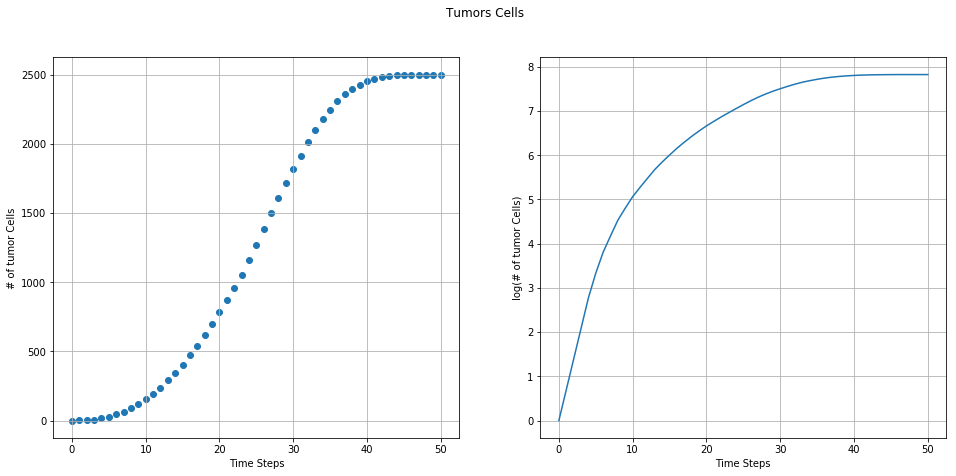

In [12]:
f = plt.figure(figsize=(16,7))
f.suptitle('Tumors Cells')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
tumor_history = np.sum(np.array(hc.history) != None,axis=1)
ax.scatter(np.arange(len(tumor_history)), tumor_history)
ax.set_ylabel("# of tumor Cells")
ax.set_xlabel("Time Steps")
ax.grid(True)
ax2.plot(np.arange(len(tumor_history)), np.log(tumor_history))
ax2.set_ylabel("log(# of tumor Cells)")
ax2.set_xlabel("Time Steps")
ax2.grid(True)
plt.show()